<a href="https://colab.research.google.com/github/TofayelAhamedTopu/Machine_Learning_Data_Visualization/blob/main/Human_Gender_Recognition_Using_Voice_Visualisation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus
import seaborn as sns

In [ ]:
from google.colab import  drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import warnings
warnings.filterwarnings('ignore')
# read file
voice=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Continuous Speech Voice Gender Classification/voice.csv')
voice.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.203113,0.062406,0.228241,0.135874,0.256796,0.120922,2.131880,8.048923,0.920532,0.363252,0.256546,0.203113,0.120205,0.015748,0.275862,0.396763,0.53125,1.000000,1.000000,0.187567,male
1,0.179908,0.054234,0.166930,0.144026,0.225790,0.081765,1.979066,8.342500,0.935432,0.414462,0.149077,0.179908,0.138831,0.015795,0.271186,0.428894,0.53125,4.171875,4.171875,0.080946,male
2,0.154634,0.066745,0.157478,0.120972,0.192534,0.071563,1.708275,6.527846,0.959577,0.679611,0.150177,0.154634,0.128165,0.043406,0.279114,0.360934,0.53125,4.285107,4.285107,0.067631,male
3,0.197191,0.061735,0.179982,0.140525,0.261097,0.120572,2.332840,9.071292,0.896264,0.243173,0.271248,0.197191,0.135548,0.016048,0.262295,0.471635,0.53125,3.742188,3.742188,0.115495,male
4,0.190275,0.067959,0.184533,0.142575,0.256946,0.114370,2.662875,12.302079,0.934852,0.526194,0.273199,0.190275,0.129316,0.043193,0.279114,0.445149,0.53125,3.725244,3.725244,0.071785,male


In [ ]:
voice.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   meanfreq  660 non-null    float64
 1   sd        660 non-null    float64
 2   median    660 non-null    float64
 3   Q25       660 non-null    float64
 4   Q75       660 non-null    float64
 5   IQR       660 non-null    float64
 6   skew      660 non-null    float64
 7   kurt      660 non-null    float64
 8   sp.ent    660 non-null    float64
 9   sfm       660 non-null    float64
 10  mode      660 non-null    float64
 11  centroid  660 non-null    float64
 12  meanfun   660 non-null    float64
 13  minfun    660 non-null    float64
 14  maxfun    660 non-null    float64
 15  meandom   660 non-null    float64
 16  mindom    660 non-null    float64
 17  maxdom    660 non-null    float64
 18  dfrange   660 non-null    float64
 19  modindx   660 non-null    float64
 20  label     660 non-null    object

In [ ]:
voice['label'].value_counts()

male      442
female    218
Name: label, dtype: int64

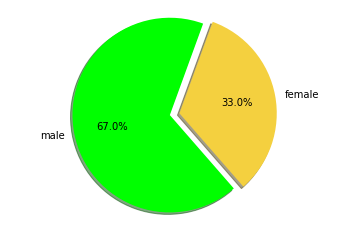

In [ ]:
labels = 'male', 'female'
sizes = [442,218]
colors = ['#00FF00','#F4D03F']
explode = (0, 0.1)
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=70)

plt.axis('equal')
plt.show()

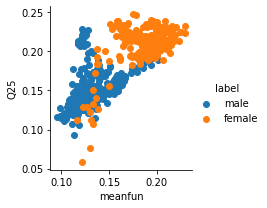

In [ ]:
# We can compare other features by simply change "meanfun" and "Q25"
sns.FacetGrid(voice, hue="label", size=3)\
   .map(plt.scatter, "meanfun","Q25")\
   .add_legend()
plt.show()

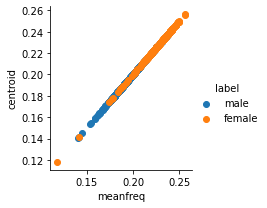

In [ ]:
# We can compare other features by simply change "Q25" and "meanfreq"
sns.FacetGrid(voice, hue="label", size=3)\
   .map(plt.scatter,"meanfreq","centroid")\
   .add_legend()
plt.show()

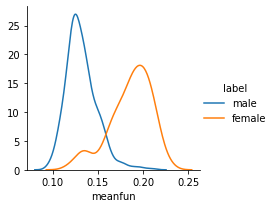

In [ ]:
# We can visualize other features by substituting "meanfun"
sns.FacetGrid(voice, hue="label",size=3) \
   .map(sns.kdeplot, "meanfun") \
   .add_legend()
plt.show()

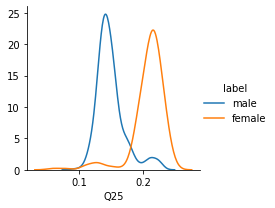

In [ ]:
# We can visualize other features by substituting Q25
sns.FacetGrid(voice, hue="label", size=3) \
   .map(sns.kdeplot, "Q25") \
   .add_legend()
plt.show()

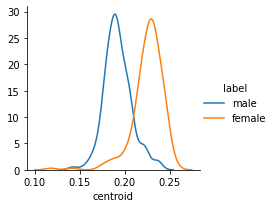

In [ ]:
# We can visualize other features by substituting centroid
sns.FacetGrid(voice, hue="label", size=3) \
   .map(sns.kdeplot,"centroid") \
   .add_legend()
plt.show()

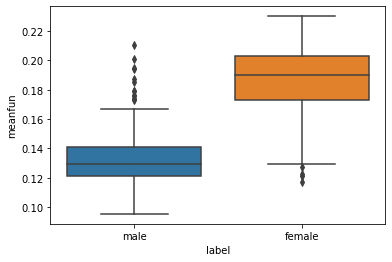

In [ ]:
# We can visualize other features by substituting "meanfun"
sns.boxplot(x="label",y="meanfun",data=voice)
plt.show()

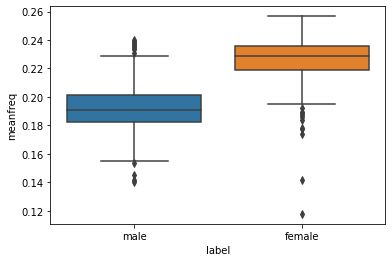

In [ ]:
# We can visualize other features by substituting "meanfreq"
sns.boxplot(x="label",y="meanfreq",data=voice)
plt.show()

In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
voice["label"] = le.fit_transform(voice["label"])
le.classes_

array(['female', 'male'], dtype=object)

In [ ]:
voice[:]=preprocessing.MinMaxScaler().fit_transform(voice)
voice.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.614220,0.648177,0.788422,0.410229,0.838379,0.827376,0.195345,0.031463,0.677143,0.450914,0.898551,0.614220,0.184105,0.002927,0.973058,0.220561,1.0,0.021871,0.030003,0.632283,1.0
1,0.447321,0.522280,0.428152,0.453203,0.535645,0.509342,0.171921,0.033366,0.766486,0.518092,0.433701,0.447321,0.322463,0.004193,0.934320,0.259311,1.0,0.169864,0.176766,0.244744,1.0
2,0.265544,0.715027,0.372612,0.331664,0.210938,0.426483,0.130413,0.021599,0.911264,0.865920,0.438460,0.265544,0.243239,0.754106,1.000000,0.177350,1.0,0.175147,0.182005,0.196347,1.0
3,0.571632,0.637845,0.504849,0.434748,0.880371,0.824533,0.226150,0.038092,0.531629,0.293391,0.962146,0.571632,0.298080,0.011078,0.860654,0.310857,1.0,0.149815,0.156884,0.370323,1.0
4,0.521884,0.733728,0.531590,0.445558,0.839844,0.774167,0.276740,0.059042,0.763011,0.664665,0.970582,0.521884,0.251785,0.748333,1.000000,0.278915,1.0,0.149025,0.156100,0.211448,1.0


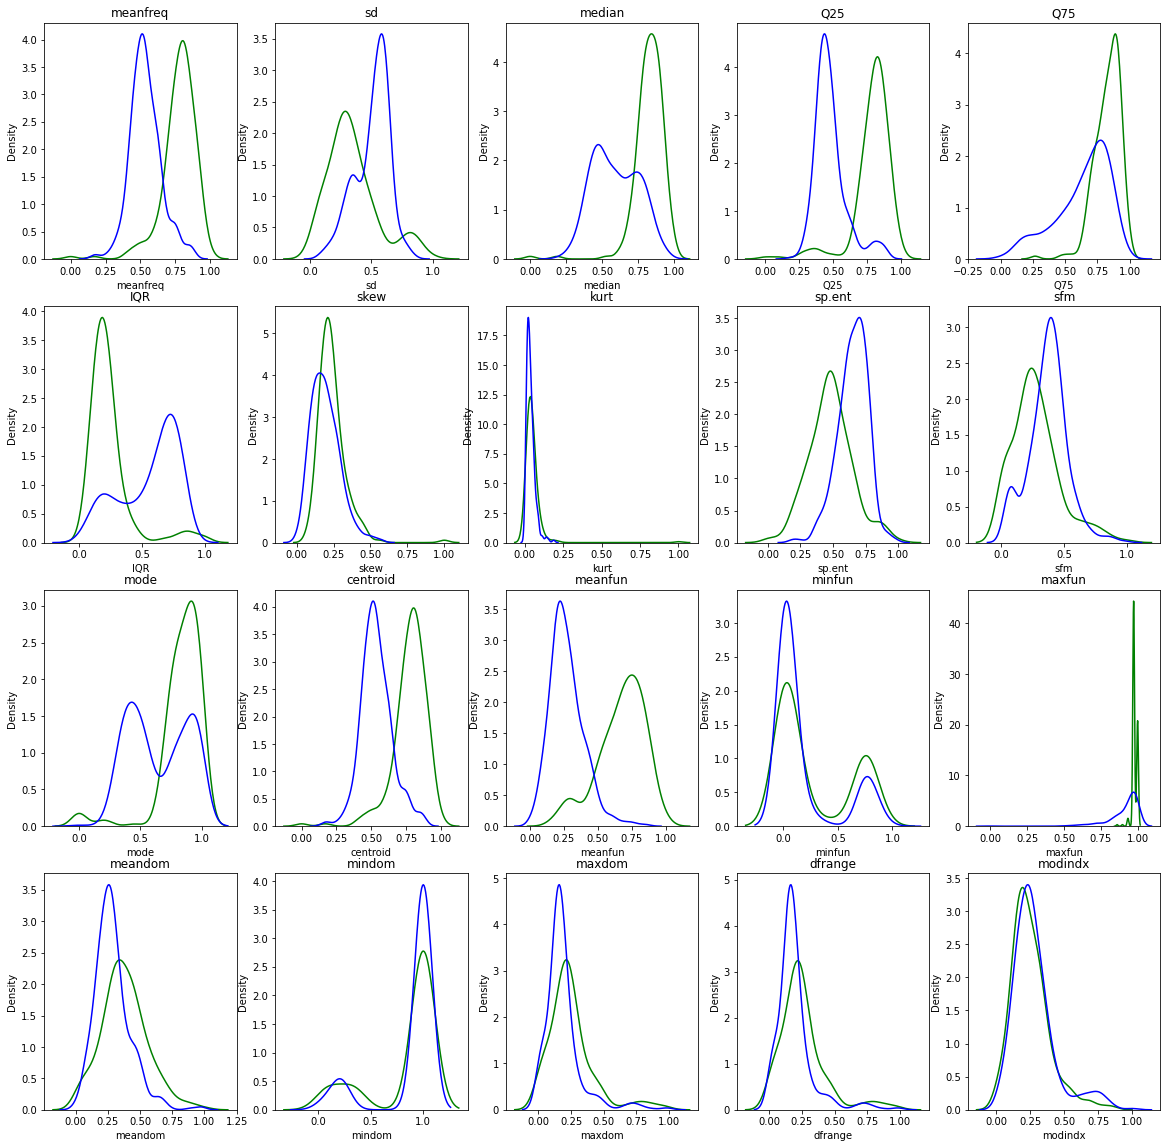

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.subplots(4,5,figsize=(20,20))
for i in range(1,21):
    plt.subplot(4,5,i)
    plt.title(voice.columns[i-1])
    sns.kdeplot(voice.loc[voice['label'] == 0, voice.columns[i-1]], color= 'green', label='F')
    sns.kdeplot(voice.loc[voice['label'] == 1, voice.columns[i-1]], color= 'blue', label='M')

In [ ]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import neighbors
from sklearn import naive_bayes
from sklearn import tree
from sklearn import ensemble
from sklearn import svm
from sklearn import neural_network
import xgboost
from sklearn.metrics import classification_report

In [ ]:
train, test = train_test_split(voice, test_size=0.3)

In [ ]:
train.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
98,0.767649,0.178412,0.779606,0.799367,0.729492,0.137287,0.205384,0.032163,0.440107,0.091524,0.710145,0.767649,0.166667,0.751790,0.985456,0.280089,1.000000,0.151034,0.158093,0.249896,1.0
194,0.481215,0.354371,0.518366,0.530978,0.360840,0.244110,0.135873,0.018198,0.676720,0.453798,0.559377,0.481215,0.486802,0.019092,0.973058,0.186626,1.000000,0.133412,0.140617,0.168425,1.0
486,0.812589,0.314966,0.845137,0.813077,0.872070,0.234768,0.193647,0.030056,0.496942,0.278860,0.888168,0.812589,0.805688,0.011954,0.973058,0.333003,1.000000,0.243131,0.249424,0.161986,0.0
261,0.436081,0.361004,0.465472,0.514105,0.252441,0.179935,0.287583,0.060893,0.633576,0.473969,0.540125,0.436081,0.434675,0.006321,0.825603,0.337983,0.014706,0.240944,0.246893,0.195745,1.0
322,0.638800,0.656738,0.864531,0.416557,0.875488,0.848497,0.215647,0.032975,0.507079,0.306346,0.883409,0.638800,0.212413,0.044498,0.696021,0.171298,1.000000,0.119925,0.127242,0.229661,1.0


In [ ]:
x_train = train.iloc[:, :-1]
y_train = train["label"]
x_test = test.iloc[:, :-1]
y_test = test["label"]
#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(x_train)
X_test = sc_X.transform(x_test)

# Creating a Dictionaire
model_accuracy = {}
model_accuracy_3 = {}

In [ ]:
def classify(model,x_train,y_train,x_test,y_test):
    from sklearn.metrics import classification_report
    target_names = ['female', 'male']
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    print(classification_report(y_test, y_pred, target_names=target_names, digits=4))

##K-Nearest Neighbors

In [ ]:
def knn_error(k,x_train,y_train,x_test,y_test):
    error_rate = []
    K=range(1,k)
    for i in K:
        knn = neighbors.KNeighborsClassifier(n_neighbors = i)
        knn.fit(x_train, y_train)
        y_pred = knn.predict(x_test)
        error_rate.append(np.mean(y_pred != y_test))
    kloc = error_rate.index(min(error_rate))
    print("Lowest error is %s occurs at k=%s." % (error_rate[kloc], K[kloc]))

    plt.plot(K, error_rate, color='blue', linestyle='dashed', marker='o',
             markerfacecolor='red', markersize=10)
    plt.title('Error Rate vs. K Value')
    plt.xlabel('K')
    plt.ylabel('Error Rate')
    plt.show()
    return K[kloc]

Lowest error is 0.020202020202020204 occurs at k=1.


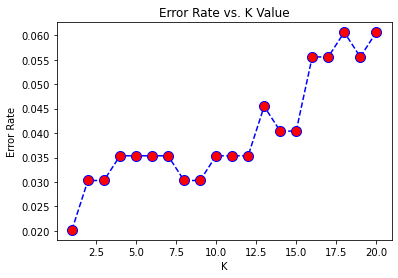

In [ ]:
k=knn_error(21,x_train,y_train,x_test,y_test)

              precision    recall  f1-score   support

      female     0.9437    1.0000    0.9710        67
        male     1.0000    0.9695    0.9845       131

    accuracy                         0.9798       198
   macro avg     0.9718    0.9847    0.9778       198
weighted avg     0.9809    0.9798    0.9799       198



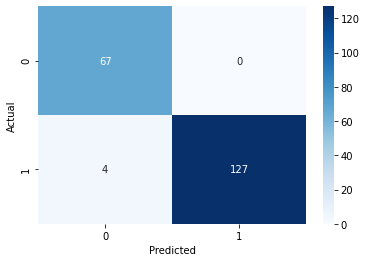

KNN: 0.9797979797979798


In [ ]:
model = neighbors.KNeighborsClassifier(n_neighbors = k)
classify(model,x_train,y_train,x_test,y_test)
y_pred = model.predict(x_test)
import seaborn
cf_matrix = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(6,4))
seaborn.heatmap(cf_matrix, annot=True, fmt='d',cmap='Blues')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()
from sklearn import metrics
print( "KNN: {}".format(metrics.accuracy_score(y_test,y_pred)) )

model_accuracy['KNN'] = metrics.accuracy_score(y_test,y_pred)

In [ ]:
cv_score=cross_val_score(model,x_train,y_train,cv=5)
cv_score

array([0.95698925, 0.98924731, 0.98913043, 0.9673913 , 0.97826087])

In [ ]:
model = neighbors.KNeighborsClassifier(n_neighbors = k)
classify(model,x_train,y_train,x_test,y_test)
y_pred = model.predict(x_test)

print( "KNN Train : {}".format(model.score(x_train,y_train)))
print( "KNN Test : {}".format(model.score(x_test,y_test)))

              precision    recall  f1-score   support

      female     0.9649    0.9649    0.9649        57
        male     0.9858    0.9858    0.9858       141

    accuracy                         0.9798       198
   macro avg     0.9754    0.9754    0.9754       198
weighted avg     0.9798    0.9798    0.9798       198

KNN Train : 1.0
KNN Test : 0.9797979797979798


##Naive Bayes

              precision    recall  f1-score   support

      female     0.7973    0.9365    0.8613        63
        male     0.9677    0.8889    0.9266       135

    accuracy                         0.9040       198
   macro avg     0.8825    0.9127    0.8940       198
weighted avg     0.9135    0.9040    0.9059       198



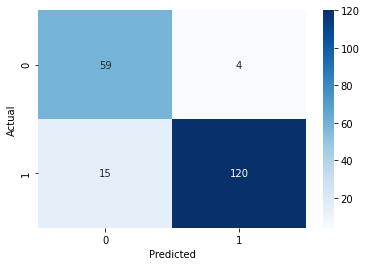

Naive Bayes: 0.9040404040404041


In [ ]:
model=naive_bayes.GaussianNB()
classify(model,x_train,y_train,x_test,y_test)
y_pred = model.predict(x_test)
import seaborn
cf_matrix = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(6,4))
seaborn.heatmap(cf_matrix, annot=True, fmt='d',cmap='Blues')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()
from sklearn import metrics
print( "Naive Bayes: {}".format(metrics.accuracy_score(y_test,y_pred)) )

model_accuracy['Naive Bayes'] = metrics.accuracy_score(y_test,y_pred)

In [ ]:
cv_score=cross_val_score(model,x_train,y_train,cv=5)
cv_score

array([0.92473118, 0.89247312, 0.94565217, 0.92391304, 0.90217391])

##Decision Tree

In [ ]:
#Find the best parameter to prune the tree
def dt_error(n,x_train,y_train,x_test,y_test):
    nodes = range(2, n)
    error_rate = []
    for k in nodes:
        model = tree.DecisionTreeClassifier(max_leaf_nodes=k)
        model.fit(x_train, y_train)
        y_pred = model.predict(x_test)
        error_rate.append(np.mean(y_pred != y_test))
    kloc = error_rate.index(min(error_rate))
    print("Lowest error is %s occurs at n=%s." % (error_rate[kloc], nodes[kloc]))
    plt.plot(nodes, error_rate, color='blue', linestyle='dashed', marker='o',
             markerfacecolor='red', markersize=10)
    plt.xlabel('Tree Size')
    plt.ylabel('Cross-Validated MSE')
    plt.show()
    return nodes[kloc]

Lowest error is 0.020202020202020204 occurs at n=8.


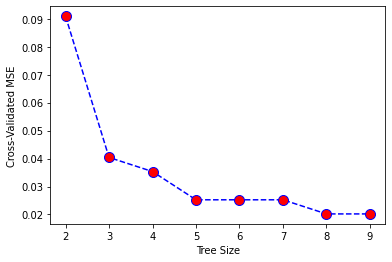

In [ ]:
n=dt_error(10,x_train,y_train,x_test,y_test)

              precision    recall  f1-score   support

      female     0.9538    0.9841    0.9688        63
        male     0.9925    0.9778    0.9851       135

    accuracy                         0.9798       198
   macro avg     0.9732    0.9810    0.9769       198
weighted avg     0.9802    0.9798    0.9799       198



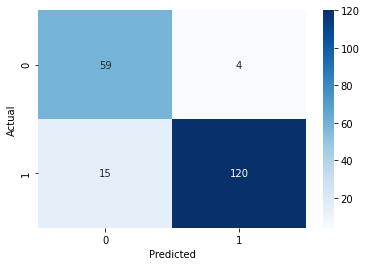

Decision Tree: 0.9040404040404041


In [ ]:
#prune tree
pruned_tree = tree.DecisionTreeClassifier(criterion = 'gini', max_leaf_nodes = n)
classify(pruned_tree,x_train,y_train,x_test,y_test)
import seaborn
cf_matrix = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(6,4))
seaborn.heatmap(cf_matrix, annot=True, fmt='d',cmap='Blues')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()
from sklearn import metrics
print( "Decision Tree: {}".format(metrics.accuracy_score(y_test,y_pred)) )

model_accuracy['Decision Tree'] = metrics.accuracy_score(y_test,y_pred)

In [ ]:
cv_score=cross_val_score(model,x_train,y_train,cv=5)
cv_score

array([0.92473118, 0.89247312, 0.94565217, 0.92391304, 0.90217391])

##Random Forest

In [ ]:
def rf_error(n,x_train,y_train,x_test,y_test):
    error_rate = []
    e=range(1,n,20)
    for i in e:
        model = ensemble.RandomForestClassifier(n_estimators = i)
        model.fit(x_train, y_train)
        y_pred = model.predict(x_test)
        error_rate.append(np.mean(y_pred != y_test))
    nloc = error_rate.index(min(error_rate))
    print("Lowest error is %s occurs at n=%s." % (error_rate[nloc], e[nloc]))

    plt.plot(e, error_rate, color='blue', linestyle='dashed', marker='o',
             markerfacecolor='red', markersize=10)
    plt.title('Error Rate vs. n Value')
    plt.xlabel('n')
    plt.ylabel('Error Rate')
    plt.show()
    return e[nloc]

Lowest error is 0.005050505050505051 occurs at n=61.


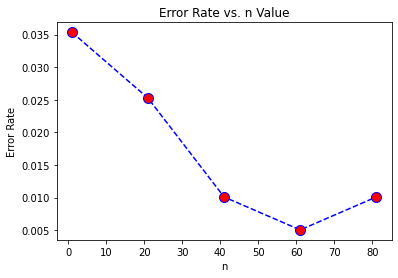

In [ ]:
e=rf_error(100,x_train,y_train,x_test,y_test)

              precision    recall  f1-score   support

      female     0.9688    0.9841    0.9764        63
        male     0.9925    0.9852    0.9888       135

    accuracy                         0.9848       198
   macro avg     0.9806    0.9847    0.9826       198
weighted avg     0.9850    0.9848    0.9849       198



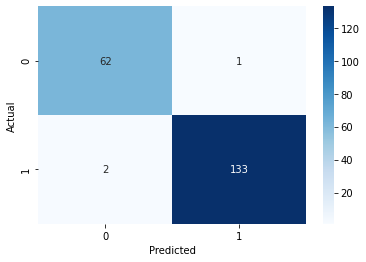

Random Forest: 0.9848484848484849


In [ ]:
model=ensemble.RandomForestClassifier(n_estimators = e)
classify(model,x_train,y_train,x_test,y_test)
y_pred = model.predict(x_test)
import seaborn
cf_matrix = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(6,4))
seaborn.heatmap(cf_matrix, annot=True, fmt='d',cmap='Blues')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()
from sklearn import metrics
print( "Random Forest: {}".format(metrics.accuracy_score(y_test,y_pred)) )

model_accuracy['Random Forest'] = metrics.accuracy_score(y_test,y_pred)

In [ ]:
cv_score=cross_val_score(model,x_train,y_train,cv=5)
cv_score

array([1.        , 0.98924731, 0.98913043, 0.98913043, 0.97826087])

##XgBoost

              precision    recall  f1-score   support

      female     0.9688    0.9841    0.9764        63
        male     0.9925    0.9852    0.9888       135

    accuracy                         0.9848       198
   macro avg     0.9806    0.9847    0.9826       198
weighted avg     0.9850    0.9848    0.9849       198



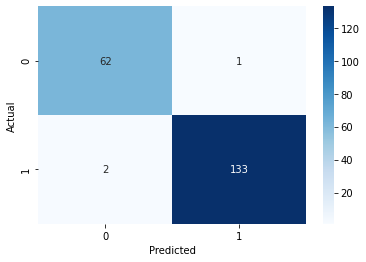

XgBoost: 0.9848484848484849


In [ ]:
model = xgboost.XGBClassifier()
classify(model,x_train,y_train,x_test,y_test)
y_pred = model.predict(x_test)
import seaborn
cf_matrix = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(6,4))
seaborn.heatmap(cf_matrix, annot=True, fmt='d',cmap='Blues')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()
from sklearn import metrics
print( "XgBoost: {}".format(metrics.accuracy_score(y_test,y_pred)) )

model_accuracy['XgBoost'] = metrics.accuracy_score(y_test,y_pred)

In [ ]:
cv_score=cross_val_score(model,x_train,y_train,cv=5)
cv_score

array([0.98924731, 0.98924731, 0.97826087, 0.97826087, 0.97826087])

##Support Vector Machine

In [ ]:
def svm_kernel(x_train,y_train,x_test,y_test):
    rate=[]
    kernel=['rbf','poly','linear']
    for i in kernel:
        model=svm.SVC(kernel=i).fit(x_train,y_train)
        y_pred=model.predict(x_train)
        print(i, ' in-sample accuracy in SVM: ', accuracy_score(y_train,y_pred))
        y_pred=model.predict(x_test)
        print(i, ' out-of-sample accuracy in SVM: ', accuracy_score(y_test,y_pred))
        rate.append(accuracy_score(y_test,y_pred))
    nloc = rate.index(max(rate))
    print("Highest accuracy is %s occurs at %s kernel." % (rate[nloc], kernel[nloc]))
    return kernel[nloc]

In [ ]:
def svm_error(k,C,x_train,y_train,x_test,y_test):
    error_rate = []
    C=range(1,C)
    for i in C:
        model=svm.SVC(kernel=k,C=i).fit(x_train,y_train)
        model.fit(x_train, y_train)
        y_pred = model.predict(x_test)
        error_rate.append(np.mean(y_pred != y_test))
    cloc = error_rate.index(min(error_rate))
    print("Lowest error is %s occurs at C=%s." % (error_rate[cloc], C[cloc]))

    plt.plot(C, error_rate, color='blue', linestyle='dashed', marker='o',
             markerfacecolor='red', markersize=10)
    plt.title('Error Rate vs. C Value')
    plt.xlabel('C')
    plt.ylabel('Error Rate')
    plt.show()
    return C[cloc]

In [ ]:
k=svm_kernel(x_train,y_train,x_test,y_test)

rbf  in-sample accuracy in SVM:  0.9913419913419913
rbf  out-of-sample accuracy in SVM:  0.9797979797979798
poly  in-sample accuracy in SVM:  0.9956709956709957
poly  out-of-sample accuracy in SVM:  0.9797979797979798
linear  in-sample accuracy in SVM:  0.9891774891774892
linear  out-of-sample accuracy in SVM:  0.9696969696969697
Highest accuracy is 0.9797979797979798 occurs at rbf kernel.


Lowest error is 0.015151515151515152 occurs at C=8.


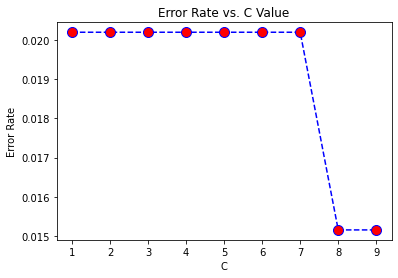

In [ ]:
c=svm_error(k,10,x_train,y_train,x_test,y_test)

              precision    recall  f1-score   support

      female     0.9545    1.0000    0.9767        63
        male     1.0000    0.9778    0.9888       135

    accuracy                         0.9848       198
   macro avg     0.9773    0.9889    0.9828       198
weighted avg     0.9855    0.9848    0.9849       198



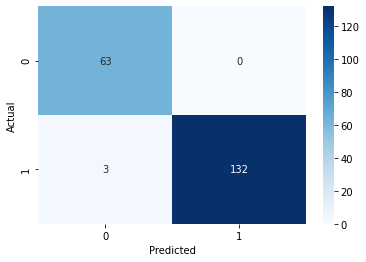

SVM: 0.9848484848484849


In [ ]:
model=svm.SVC(kernel=k,C=c)
classify(model,x_train,y_train,x_test,y_test)
y_pred = model.predict(x_test)
import seaborn
cf_matrix = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(6,4))
seaborn.heatmap(cf_matrix, annot=True, fmt='d',cmap='Blues')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()
from sklearn import metrics
print( "SVM: {}".format(metrics.accuracy_score(y_test,y_pred)) )

model_accuracy['SVM'] = metrics.accuracy_score(y_test,y_pred)

In [ ]:
cv_score=cross_val_score(model,x_train,y_train,cv=5)
cv_score

array([0.98924731, 0.98924731, 0.98913043, 1.        , 0.9673913 ])

##Neural Network

In [ ]:
def nn_error(n,x_train,y_train,x_test,y_test):
    error_rate = []
    hidden_layer=range(1,n)
    for i in hidden_layer:
        model = neural_network.MLPClassifier(solver='adam', alpha=1e-5,
                                       hidden_layer_sizes=i,
                                       activation='logistic',random_state=17,
                                       max_iter=2000)
        model.fit(x_train, y_train)
        y_pred = model.predict(x_test)
        error_rate.append(np.mean(y_pred != y_test))
    kloc = error_rate.index(min(error_rate))
    print("Lowest error is %s occurs at C=%s." % (error_rate[kloc], hidden_layer[kloc]))

    plt.plot(hidden_layer, error_rate, color='blue', linestyle='dashed', marker='o',
             markerfacecolor='red', markersize=10)
    plt.title('Error Rate vs. Hidden Layer Size')
    plt.xlabel('Size')
    plt.ylabel('Error Rate')
    plt.show()
    return hidden_layer[kloc]

Lowest error is 0.030303030303030304 occurs at C=8.


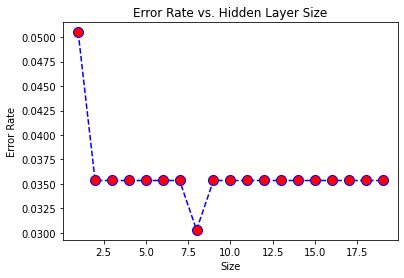

In [ ]:
h=nn_error(20,x_train,y_train,x_test,y_test)

              precision    recall  f1-score   support

      female     0.9385    0.9683    0.9531        63
        male     0.9850    0.9704    0.9776       135

    accuracy                         0.9697       198
   macro avg     0.9617    0.9693    0.9654       198
weighted avg     0.9702    0.9697    0.9698       198



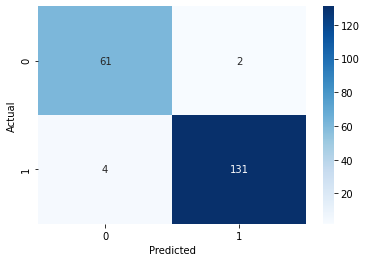

NN: 0.9696969696969697


In [ ]:
model = neural_network.MLPClassifier(solver='adam', alpha=1e-5,
                                       hidden_layer_sizes=h,
                                       activation='logistic',random_state=17,
                                       max_iter=2000)
classify(model,x_train,y_train,x_test,y_test)
y_pred = model.predict(x_test)
import seaborn
cf_matrix = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(6,4))
seaborn.heatmap(cf_matrix, annot=True, fmt='d',cmap='Blues')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()
from sklearn import metrics
print( "NN: {}".format(metrics.accuracy_score(y_test,y_pred)) )

model_accuracy['NN'] = metrics.accuracy_score(y_test,y_pred)

In [ ]:
cv_score=cross_val_score(model,x_train,y_train,cv=5)
cv_score

array([0.97849462, 0.96774194, 0.9673913 , 0.98913043, 0.91304348])

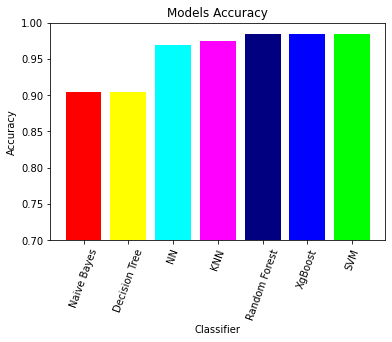

In [ ]:
#Models Accuracy             
from collections import OrderedDict
model_accuracy = OrderedDict(sorted(model_accuracy.items(), key=lambda t: t[1]))
plt.bar(range(len(model_accuracy)), model_accuracy.values(),align='center', color=['#FF0000', '#FFFF00', '#00FFFF', '#FF00FF', '#000080', '#0000FF', '#00FF00'])
plt.xticks(range(len(model_accuracy)), model_accuracy.keys(), rotation =70)
axes = plt.gca()
axes.set_ylim([.7,1.0])
plt.xlabel('Classifier') 
plt.ylabel('Accuracy')
plt.title("Models Accuracy")
plt.show()

##Feature Importances

In [ ]:
X = voice.iloc[:, : -1].values

y = voice.iloc[:, 20].values 

In [ ]:
#Random Forest Classification to the Training set
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=250, criterion='entropy',random_state=0)
classifier.fit(x_train, y_train)

#Predicting the Test set results
y_pred = classifier.predict(x_test)

#Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

#Calculating the Performance of Random Forest Classification
from sklearn import metrics
print( "Accuracy of Random Forest Classification: {}".format(metrics.accuracy_score(y_test,y_pred)) )


Accuracy of Random Forest Classification: 0.9848484848484849


In [ ]:
#Feature Importances               
header = list(voice)

classifier.fit(x_train, y_train)
importances = classifier.feature_importances_
std = np.std([tree.feature_importances_ for tree in classifier.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1] # list in reverse order

#Print the feature ranking
print("Feature ranking:")
header1 = []
for f in range(X.shape[1]):
    print("%d. Feature %s (%f)" % (f + 1, header[indices[f]], importances[indices[f]]))
    header1.append(header[indices[f]])

Feature ranking:
1. Feature meanfun (0.211988)
2. Feature Q25 (0.171624)
3. Feature centroid (0.106854)
4. Feature meanfreq (0.095270)
5. Feature median (0.058992)
6. Feature sd (0.057241)
7. Feature IQR (0.055858)
8. Feature sfm (0.037430)
9. Feature mode (0.033114)
10. Feature maxfun (0.032423)
11. Feature sp.ent (0.026759)
12. Feature minfun (0.024647)
13. Feature Q75 (0.020053)
14. Feature meandom (0.016847)
15. Feature maxdom (0.012628)
16. Feature kurt (0.010224)
17. Feature dfrange (0.010124)
18. Feature modindx (0.008472)
19. Feature skew (0.006546)
20. Feature mindom (0.002906)


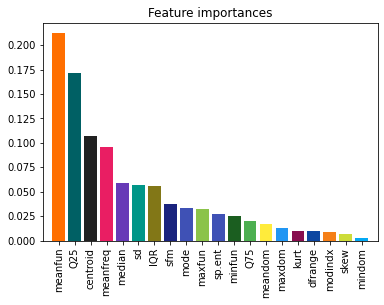

In [ ]:
# Plot the feature importances of the forest with Material Design
import random 
colors = ['#F44336', '#E91E63', '#9C27B0', '#673AB7', '#3F51B5', '#3F51B5', '#2196F3',
          '#03A9F4' ,'#00BCD4', '#009688', '#4CAF50', '#8BC34A', '#CDDC39', '#FFEB3B',
          '#FFC107', '#FF9800', '#FF5722', '#795548', '#607D8B', '#B71C1C', '#880E4F',
          '#4A148C', '#311B92', '#1A237E', '#0D47A1', '#01579B', '#006064', '#004D40',
          '#1B5E20', '#33691E', '#827717', '#F57F17', '#FF6F00', '#E65100', '#BF360C',
          '#3E2723', '#212121', '#607D8B']

random_colors = random.sample(colors, 20)

plt.figure()

plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color=random_colors, align="center")
plt.xticks(range(X.shape[1]),header1, rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()

In [ ]:
x_train3 = train[["meanfun","Q25","meanfreq","centroid"]]
y_train3 = train["label"]
x_test3 = test[["meanfun","Q25","meanfreq","centroid"]]
y_test3 = test["label"]

##KNN

Lowest error is 0.04040404040404041 occurs at k=3.


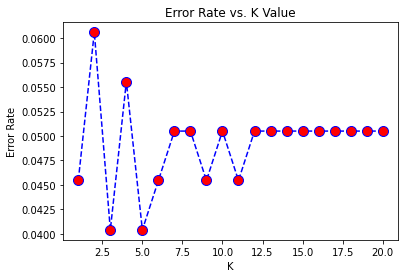

In [ ]:
k=knn_error(21,x_train3,y_train3,x_test3,y_test3)

              precision    recall  f1-score   support

      female     0.9365    0.9365    0.9365        63
        male     0.9704    0.9704    0.9704       135

    accuracy                         0.9596       198
   macro avg     0.9534    0.9534    0.9534       198
weighted avg     0.9596    0.9596    0.9596       198



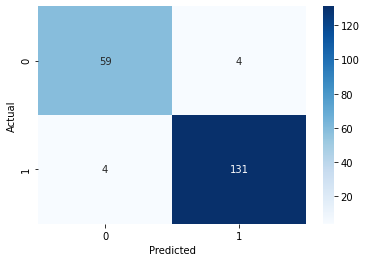

KNN_4: 0.9595959595959596


In [ ]:
model = neighbors.KNeighborsClassifier(n_neighbors = k)
classify(model,x_train3,y_train3,x_test3,y_test3)
y_pred3 = model.predict(x_test3)
import seaborn
cf_matrix = confusion_matrix(y_test3, y_pred3)
fig, ax = plt.subplots(figsize=(6,4))
seaborn.heatmap(cf_matrix, annot=True, fmt='d',cmap='Blues')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()
from sklearn import metrics
print( "KNN_4: {}".format(metrics.accuracy_score(y_test3,y_pred3)) )

model_accuracy_3['KNN_4'] = metrics.accuracy_score(y_test3,y_pred3)

In [ ]:
cv_score=cross_val_score(model,x_train3,y_train3,cv=5)
cv_score

array([0.96774194, 0.96774194, 0.9673913 , 0.97826087, 0.94565217])

##Naive Bayes

              precision    recall  f1-score   support

      female     0.7973    0.9365    0.8613        63
        male     0.9677    0.8889    0.9266       135

    accuracy                         0.9040       198
   macro avg     0.8825    0.9127    0.8940       198
weighted avg     0.9135    0.9040    0.9059       198



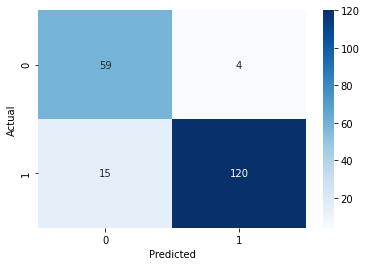

Naive Bayes_4: 0.9040404040404041


In [ ]:
model=naive_bayes.GaussianNB()
classify(model,x_train3,y_train3,x_test3,y_test3)
y_pred3 = model.predict(x_test3)
import seaborn
cf_matrix = confusion_matrix(y_test3, y_pred3)
fig, ax = plt.subplots(figsize=(6,4))
seaborn.heatmap(cf_matrix, annot=True, fmt='d',cmap='Blues')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()
from sklearn import metrics
print( "Naive Bayes_4: {}".format(metrics.accuracy_score(y_test3,y_pred3)) )

model_accuracy_3['Naive Bayes_4'] = metrics.accuracy_score(y_test3,y_pred3)

In [ ]:
cv_score=cross_val_score(model,x_train3,y_train3,cv=5)
cv_score

array([0.92473118, 0.90322581, 0.93478261, 0.94565217, 0.91304348])

##Decision Tree

Lowest error is 0.04040404040404041 occurs at n=3.


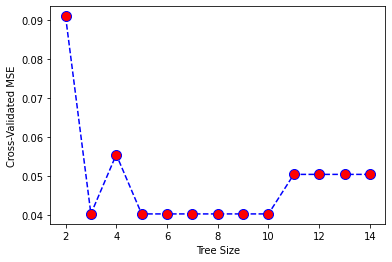

In [ ]:
n=dt_error(15,x_train3,y_train3,x_test3,y_test3)

              precision    recall  f1-score   support

      female     0.9508    0.9206    0.9355        63
        male     0.9635    0.9778    0.9706       135

    accuracy                         0.9596       198
   macro avg     0.9572    0.9492    0.9530       198
weighted avg     0.9595    0.9596    0.9594       198



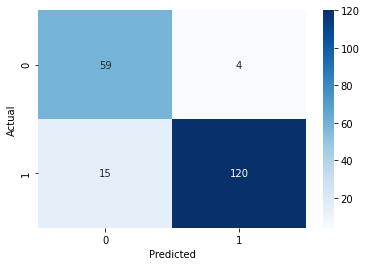

Decision Tree_4: 0.9040404040404041


In [ ]:
#prune tree
pruned_tree = tree.DecisionTreeClassifier(criterion = 'gini', max_leaf_nodes = n)
classify(pruned_tree,x_train3,y_train3,x_test3,y_test3)
y_pred3 = model.predict(x_test3)
import seaborn
cf_matrix = confusion_matrix(y_test3, y_pred3)
fig, ax = plt.subplots(figsize=(6,4))
seaborn.heatmap(cf_matrix, annot=True, fmt='d',cmap='Blues')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()
from sklearn import metrics
print( "Decision Tree_4: {}".format(metrics.accuracy_score(y_test3,y_pred3)) )

model_accuracy_3['Decision Tree_4'] = metrics.accuracy_score(y_test3,y_pred3)

In [ ]:
cv_score=cross_val_score(model,x_train3,y_train3,cv=5)
cv_score

array([0.92473118, 0.90322581, 0.93478261, 0.94565217, 0.91304348])

##Random Forest

Lowest error is 0.04040404040404041 occurs at n=61.


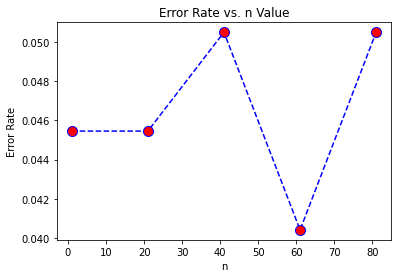

In [ ]:
e=rf_error(100,x_train3,y_train3,x_test3,y_test3)

              precision    recall  f1-score   support

      female     0.9355    0.9206    0.9280        63
        male     0.9632    0.9704    0.9668       135

    accuracy                         0.9545       198
   macro avg     0.9494    0.9455    0.9474       198
weighted avg     0.9544    0.9545    0.9544       198



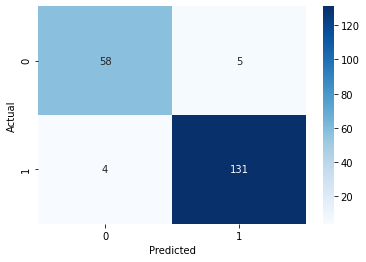

Random Forest_4: 0.9545454545454546


In [ ]:
model=ensemble.RandomForestClassifier(n_estimators = e)
classify(model,x_train3,y_train3,x_test3,y_test3)
y_pred3 = model.predict(x_test3)
import seaborn
cf_matrix = confusion_matrix(y_test3, y_pred3)
fig, ax = plt.subplots(figsize=(6,4))
seaborn.heatmap(cf_matrix, annot=True, fmt='d',cmap='Blues')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()
from sklearn import metrics
print( "Random Forest_4: {}".format(metrics.accuracy_score(y_test3,y_pred3)) )

model_accuracy_3['Random Forest_4'] = metrics.accuracy_score(y_test3,y_pred3)

In [ ]:
cv_score=cross_val_score(model,x_train3,y_train3,cv=5)
cv_score

array([0.96774194, 0.97849462, 0.97826087, 0.97826087, 0.95652174])

##XgBoost

              precision    recall  f1-score   support

      female     0.9516    0.9365    0.9440        63
        male     0.9706    0.9778    0.9742       135

    accuracy                         0.9646       198
   macro avg     0.9611    0.9571    0.9591       198
weighted avg     0.9646    0.9646    0.9646       198



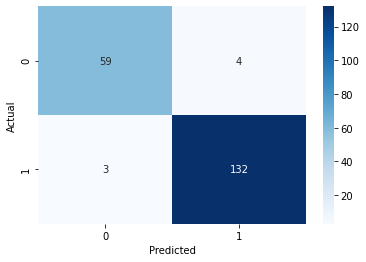

XgBoost_4: 0.9646464646464646


In [ ]:
model = xgboost.XGBClassifier()
classify(model,x_train3,y_train3,x_test3,y_test3)
y_pred3 = model.predict(x_test3)
import seaborn
cf_matrix = confusion_matrix(y_test3, y_pred3)
fig, ax = plt.subplots(figsize=(6,4))
seaborn.heatmap(cf_matrix, annot=True, fmt='d',cmap='Blues')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()
from sklearn import metrics
print( "XgBoost_4: {}".format(metrics.accuracy_score(y_test3,y_pred3)) )

model_accuracy_3['XgBoost_4'] = metrics.accuracy_score(y_test3,y_pred3)

In [ ]:
cv_score=cross_val_score(model,x_train3,y_train3,cv=5)
cv_score

array([0.96774194, 0.97849462, 0.98913043, 0.97826087, 0.95652174])

##Support Vector Machine

In [ ]:
k=svm_kernel(x_train3,y_train3,x_test3,y_test3)

rbf  in-sample accuracy in SVM:  0.9653679653679653
rbf  out-of-sample accuracy in SVM:  0.9545454545454546
poly  in-sample accuracy in SVM:  0.961038961038961
poly  out-of-sample accuracy in SVM:  0.9545454545454546
linear  in-sample accuracy in SVM:  0.9523809523809523
linear  out-of-sample accuracy in SVM:  0.9393939393939394
Highest accuracy is 0.9545454545454546 occurs at rbf kernel.


Lowest error is 0.045454545454545456 occurs at C=1.


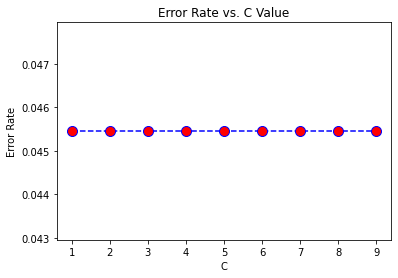

In [ ]:
c=svm_error(k,10,x_train3,y_train3,x_test3,y_test3)

              precision    recall  f1-score   support

      female     0.9355    0.9206    0.9280        63
        male     0.9632    0.9704    0.9668       135

    accuracy                         0.9545       198
   macro avg     0.9494    0.9455    0.9474       198
weighted avg     0.9544    0.9545    0.9544       198



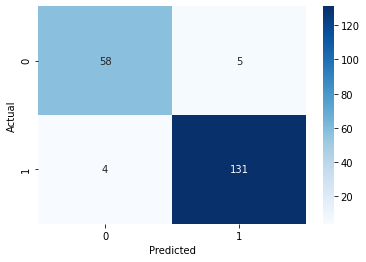

SVM_4: 0.9545454545454546


In [ ]:
model=svm.SVC(kernel=k,C=c)
classify(model,x_train3,y_train3,x_test3,y_test3)
y_pred3 = model.predict(x_test3)
import seaborn
cf_matrix = confusion_matrix(y_test3, y_pred3)
fig, ax = plt.subplots(figsize=(6,4))
seaborn.heatmap(cf_matrix, annot=True, fmt='d',cmap='Blues')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()
from sklearn import metrics
print( "SVM_4: {}".format(metrics.accuracy_score(y_test3,y_pred3)) )

model_accuracy_3['SVM_4'] = metrics.accuracy_score(y_test3,y_pred3)

In [ ]:
cv_score=cross_val_score(model,x_train3,y_train3,cv=5)
cv_score

array([0.95698925, 0.96774194, 0.9673913 , 0.9673913 , 0.94565217])

##Neural Network

Lowest error is 0.05555555555555555 occurs at C=8.


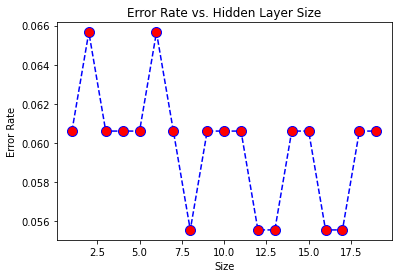

In [ ]:
h=nn_error(20,x_train3,y_train3,x_test3,y_test3)

              precision    recall  f1-score   support

      female     0.9062    0.9206    0.9134        63
        male     0.9627    0.9556    0.9591       135

    accuracy                         0.9444       198
   macro avg     0.9345    0.9381    0.9362       198
weighted avg     0.9447    0.9444    0.9446       198



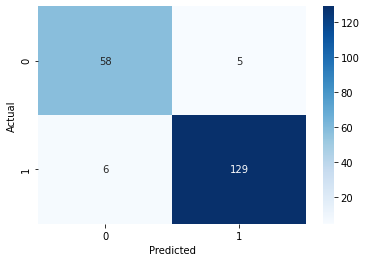

NN_4: 0.9444444444444444


In [ ]:
model = neural_network.MLPClassifier(solver='adam', alpha=1e-5,
                                       hidden_layer_sizes=h,
                                       activation='logistic',random_state=17,
                                       max_iter=2000)
classify(model,x_train3,y_train3,x_test3,y_test3)
y_pred3 = model.predict(x_test3)
import seaborn
cf_matrix = confusion_matrix(y_test3, y_pred3)
fig, ax = plt.subplots(figsize=(6,4))
seaborn.heatmap(cf_matrix, annot=True, fmt='d',cmap='Blues')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()
from sklearn import metrics
print( "NN_4: {}".format(metrics.accuracy_score(y_test3,y_pred3)) )

model_accuracy_3['NN_4'] = metrics.accuracy_score(y_test3,y_pred3)

In [ ]:
cv_score=cross_val_score(model,x_train3,y_train3,cv=5)
cv_score

array([0.95698925, 0.94623656, 0.95652174, 0.95652174, 0.93478261])

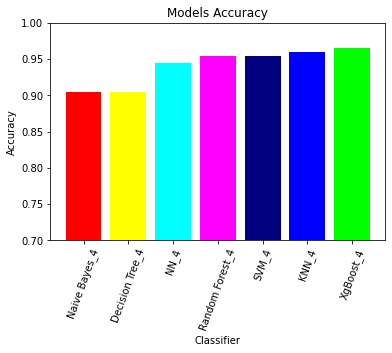

In [ ]:
#Models Accuracy             
from collections import OrderedDict
model_accuracy_3 = OrderedDict(sorted(model_accuracy_3.items(), key=lambda t: t[1]))
plt.bar(range(len(model_accuracy_3)), model_accuracy_3.values(),align='center', color=['#FF0000', '#FFFF00', '#00FFFF', '#FF00FF', '#000080', '#0000FF', '#00FF00'])
plt.xticks(range(len(model_accuracy_3)), model_accuracy_3.keys(), rotation =70)
axes = plt.gca()
axes.set_ylim([.7,1.0])
plt.xlabel('Classifier') 
plt.ylabel('Accuracy')
plt.title("Models Accuracy")
plt.show()